In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split

#model and evaluation 
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

In [11]:
#prepared datasets loading 
df=pd.read_csv("train_folds.csv")
df_test=pd.read_csv("test.csv")
sample_submission = pd.read_csv("sample_submission.csv")

In [32]:
#filer useful features from all columns
useful_features=[c for c in df.columns if c not in ("id","target","kfold")]
#filter categorical features from all useful fearures
object_columns=[col for col in useful_features if "cat" in col]
numerical_columns=[numerial for numerial in useful_features if "cont" in numerial]
df_test=df_test[useful_features]
final_pred=[]

In [13]:
# ordinalencoder
for fold in range(5):
    X_train=df[df.kfold!=fold].reset_index(drop=True)
    X_test=df[df.kfold==fold].reset_index(drop=True)
    X_fianl_test=df_test.copy()
    
    #filter object columns by name
    y_train=X_train.target
    y_test=X_test.target
    
    #filter usful columns in features
    X_train=X_train[useful_features]
    X_test=X_test[useful_features]
    
    print("\nget {} fold as test and rest for training".format(fold))
    ordinal_encoder=preprocessing.OrdinalEncoder()
    print("encoding...")
    X_train[object_columns]=ordinal_encoder.fit_transform(X_train[object_columns])
    X_test[object_columns]=ordinal_encoder.transform(X_test[object_columns])
    X_fianl_test[object_columns]=ordinal_encoder.transform(X_fianl_test[object_columns])
    model=XGBRegressor(random_state=fold,n_jobs=4)
    print("training...")
    model.fit(X_train,y_train)
    pred=model.predict(X_test)
    #submission prediction
    final_predictions=model.predict(X_fianl_test)
    final_pred.append(final_predictions)
    print("MSE : ",mean_squared_error(y_test,pred,squared=False),"fold : ",fold) 


get 0 fold as test and rest for training
encoding...
training...
MSE :  0.7242812912900478 fold :  0

get 1 fold as test and rest for training
encoding...
training...
MSE :  0.7232810321072864 fold :  1

get 2 fold as test and rest for training
encoding...
training...
MSE :  0.725452249623988 fold :  2

get 3 fold as test and rest for training
encoding...
training...
MSE :  0.725286377838993 fold :  3

get 4 fold as test and rest for training
encoding...
training...
MSE :  0.7242629367174096 fold :  4


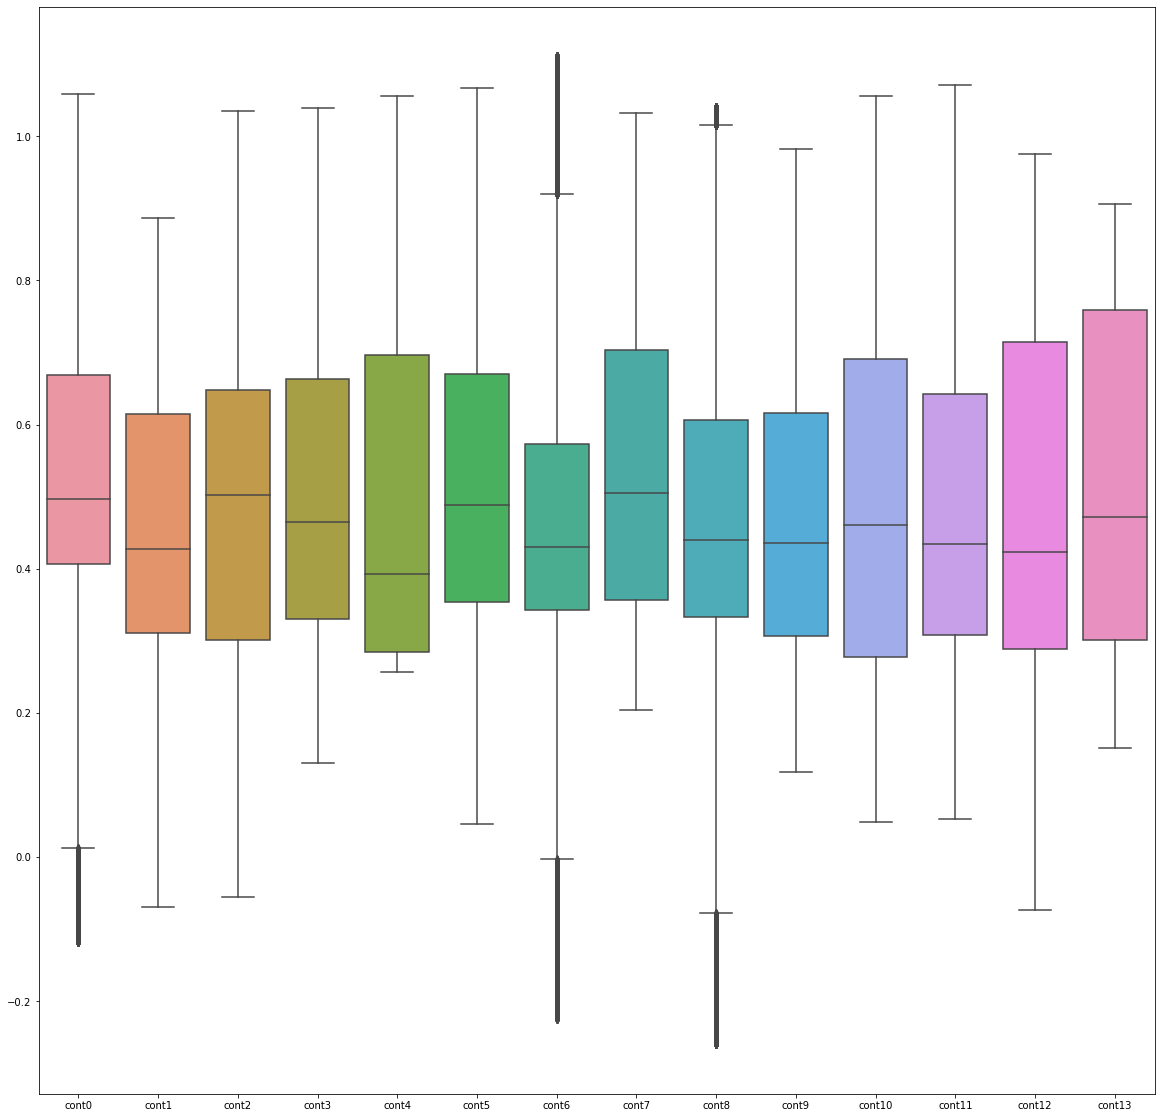

In [33]:
# Boxplot
#used for resize
fig, ax = plt.subplots(figsize=(20,20))
sns.boxplot(data=X_train[numerical])

### Standardization
What is Standardization? 

Standardization is another scaling technique where the values are centered around the mean with a unit standard deviation. This means that the mean of the attribute becomes zero and the resultant distribution has a unit standard deviation. is the standard deviation of the feature values.

In [35]:
# Standardization
for fold in range(5):
    X_train=df[df.kfold!=fold].reset_index(drop=True)
    X_test=df[df.kfold==fold].reset_index(drop=True)
    X_fianl_test=df_test.copy()
    
    #filter object columns by name
    y_train=X_train.target
    y_test=X_test.target
    
    #filter usful columns in features
    X_train=X_train[useful_features]
    X_test=X_test[useful_features]
    
    print("\nget {} fold as test and rest for training".format(fold))
    ordinal_encoder=preprocessing.OrdinalEncoder()
    print("encoding...")
    X_train[object_columns]=ordinal_encoder.fit_transform(X_train[object_columns])
    X_test[object_columns]=ordinal_encoder.transform(X_test[object_columns])
    X_fianl_test[object_columns]=ordinal_encoder.transform(X_fianl_test[object_columns])
    
    scaler=preprocessing.StandardScaler()
    print("Standardization...")
    X_train[numerical_columns]=scaler.fit_transform(X_train[numerical_columns])
    X_test[numerical_columns]=scaler.transform(X_test[numerical_columns])
    X_fianl_test[numerical_columns]=scaler.transform(X_fianl_test[numerical_columns])
    
    model=XGBRegressor(random_state=fold,n_jobs=4)
    print("training...")
    model.fit(X_train,y_train)
    pred=model.predict(X_test)
    #submission prediction
    final_predictions=model.predict(X_fianl_test)
    final_pred.append(final_predictions)
    print("MSE : ",mean_squared_error(y_test,pred,squared=False),"fold : ",fold) 


get 0 fold as test and rest for training
encoding...
Standardization...
training...
MSE :  0.7236509633691705 fold :  0

get 1 fold as test and rest for training
encoding...
Standardization...
training...
MSE :  0.723720294215325 fold :  1

get 2 fold as test and rest for training
encoding...
Standardization...
training...
MSE :  0.7246923512229724 fold :  2

get 3 fold as test and rest for training
encoding...
Standardization...
training...
MSE :  0.7254817962223026 fold :  3

get 4 fold as test and rest for training
encoding...
Standardization...
training...
MSE :  0.7237862719240257 fold :  4


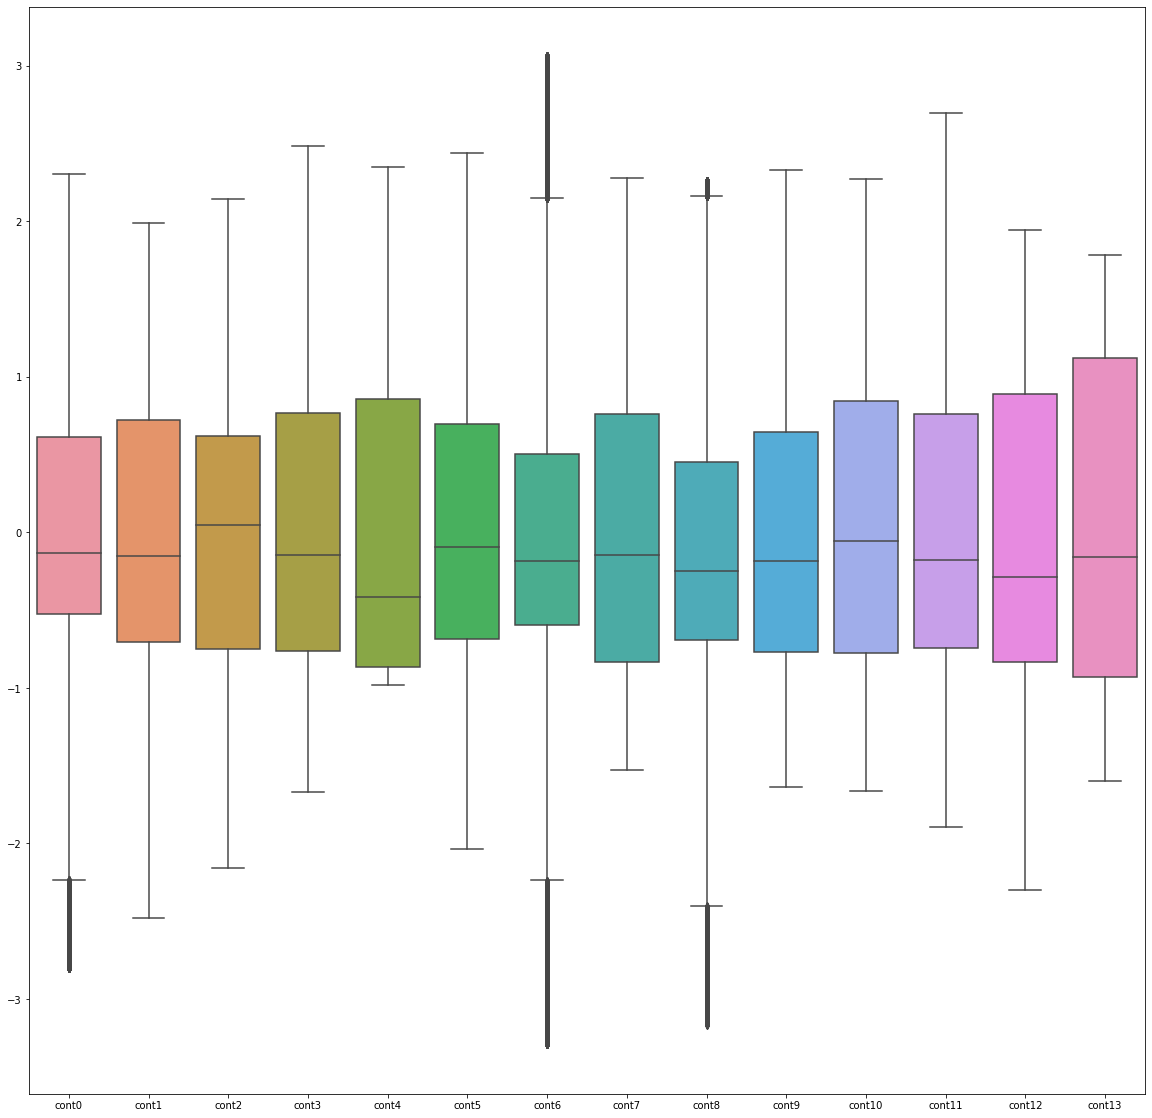

In [36]:
# Boxplot
#used for resize
fig, ax = plt.subplots(figsize=(20,20))
sns.boxplot(data=X_train[numerical])